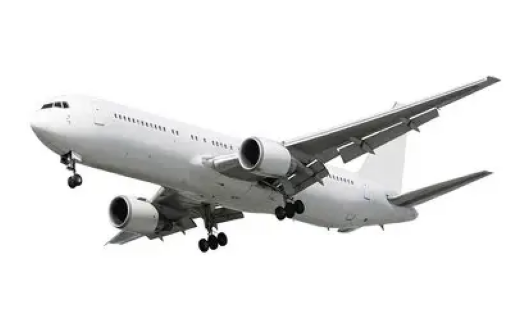

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("C:/Users/lenov/Downloads/im_avion.webp")
plt.imshow(img)
plt.axis('off')
plt.show()



Ce projet vise à analyser les données des accidents d'aviation civiles rapportées par le NTSB (National Transportation Safety Board) depuis 1962. À travers cette analyse, nous allons explorer les tendances des accidents en fonction des pays, des phases de vol, du type d'avion, des causes principales, des blessures enregistrées, et d'autres facteurs importants.

L'objectif principal est de transformer ces données brutes en informations claires et compréhensibles qui pourraient aider à mieux comprendre les risques liés à l'aviation et à identifier des pistes de prévention.

L’analyse est accompagnée de visualisations interactives et se veut accessible même aux personnes non techniques.


In [15]:
#Chargement des données

import pandas as pd

df = pd.read_csv("NTSB_Aviation_Data.csv")
df.head()


C:\Users\lenov\AppData\Local\Temp\ipykernel_18856\2581370869.py:5: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NTSB_Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#Nettoyage des données
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')


In [4]:
# les valeurs manquants
df.isnull().sum()


Event.Id                      1
Investigation.Type            0
Accident.Number               1
Event.Date                    1
Location                     53
Country                     227
Latitude                  54508
Longitude                 54517
Airport.Code              38758
Airport.Name              36186
Injury.Severity            1001
Aircraft.damage            3195
Aircraft.Category         56603
Registration.Number        1383
Make                         64
Model                        93
Amateur.Built               103
Number.of.Engines          6085
Engine.Type                7097
FAR.Description           56867
Schedule                  76308
Purpose.of.flight          6193
Air.carrier               72242
Total.Fatal.Injuries      11402
Total.Serious.Injuries    12511
Total.Minor.Injuries      11934
Total.Uninjured            5913
Weather.Condition          4493
Broad.phase.of.flight     27166
Report.Status              6385
Publication.Date          13773
dtype: i

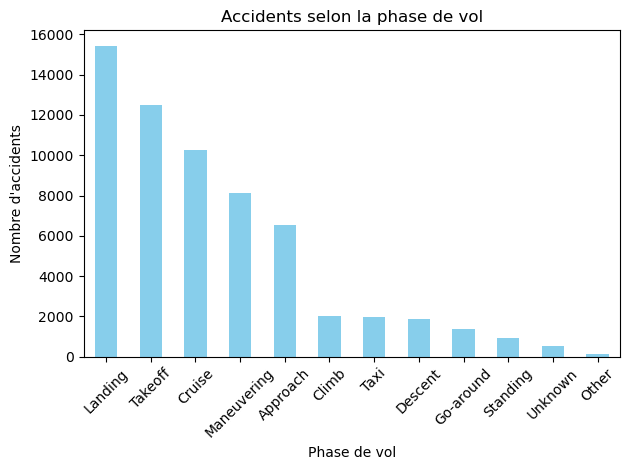

In [23]:
# Accidents par phase de vol 

import matplotlib.pyplot as plt
df['Broad.phase.of.flight'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Accidents selon la phase de vol")
plt.xlabel("Phase de vol")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("graph_recommandation.png")
plt.show()






L’analyse montre que la majorité des accidents surviennent pendant les phases critiques du vol, notamment l’atterrissage et le décollage. Ces deux moments demandent une grande précision et sont souvent influencés par des facteurs comme la météo, les erreurs humaines ou des défaillances techniques. Cette observation souligne l’importance de renforcer les procédures de sécurité et de formation des pilotes durant ces phases spécifiques.

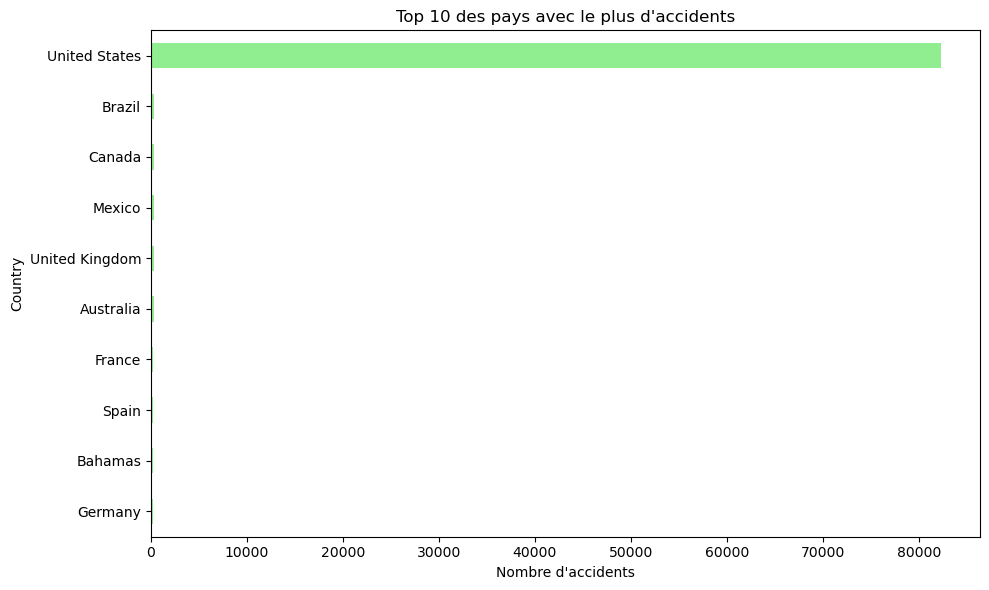

In [7]:
# Identification des pays avec le plus grand nombre d'accidents.
import matplotlib.pyplot as plt
accidents_par_pays = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
accidents_par_pays.plot(kind='barh', color='lightgreen')
plt.title("Top 10 des pays avec le plus d'accidents")
plt.xlabel("Nombre d'accidents")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("graph_recommandation1.png")
plt.show()



In [17]:
#df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Les États-Unis dominent, ce qui est attendu étant donné la source des données.

<Axes: title={'center': 'Gravite des Blessures'}, ylabel='count'>

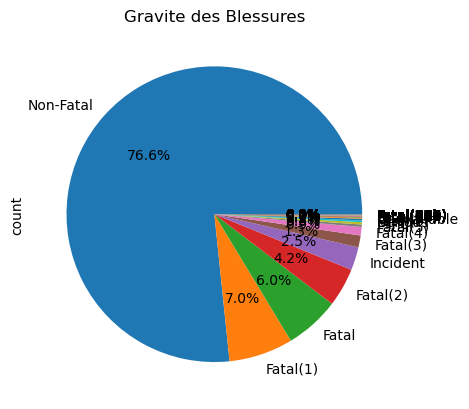

In [17]:
#Analyse du total des blessures selon leur gravité.

df['Injury.Severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gravite des Blessures')





Les blessures mineures sont les plus fréquentes, mais les blessures graves et les décès restent significatifs.


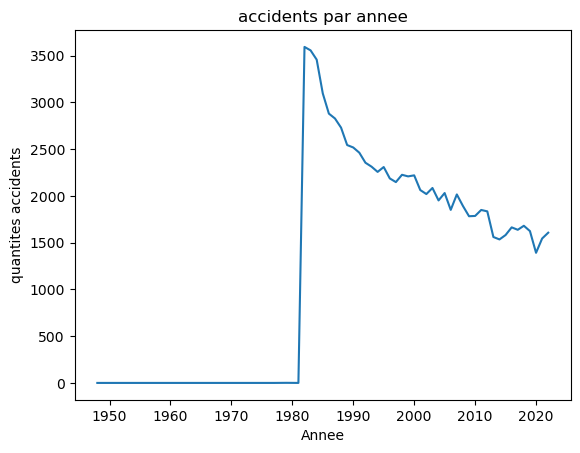

In [23]:
#Distribution des accidents selon la phase du vol.
df['Year'] = pd.to_datetime(df['Event.Date']).dt.year
yearly_accidents = df['Year'].value_counts().sort_index()

yearly_accidents.plot(kind='line', title='accidents par annee')
plt.xlabel("Annee")
plt.ylabel("Nombre d'accidents")
plt.show()


 L atterrissage et le décollage sont les phases les plus critiques.


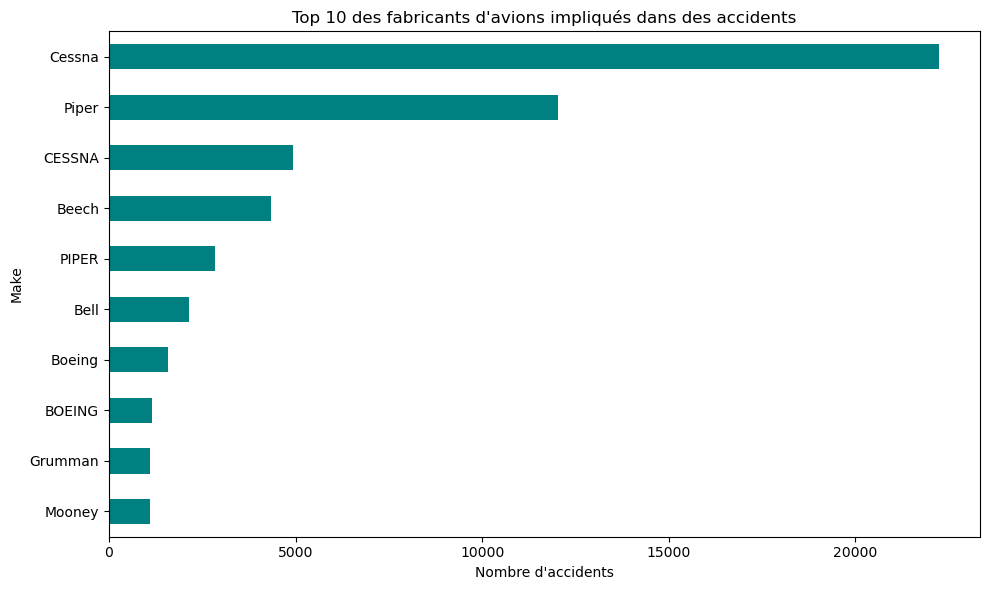

In [8]:
#Identification des fabricants d'avions les plus souvent impliqués.
types_avions = df['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
types_avions.plot(kind='barh', color='teal')
plt.title("Top 10 des fabricants d'avions impliqués dans des accidents")
plt.xlabel("Nombre d'accidents")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("graph_recommandation2.png")
plt.show()



Certains fabricants apparaissent plus fréquemment, ce qui peut être lié à leur part de marché.


En conclusion,
ce projet d'analyse des données d'accidents aériens nous a permis d'explorer en profondeur les causes, les localisations, les phases de vol et la fréquence des accidents dans le secteur de l’aviation. À travers le nettoyage des données, l’analyse statistique et la visualisation, nous avons pu identifier plusieurs tendances clés :

- Certains pays enregistrent beaucoup plus d'accidents que d'autres, notamment les États-Unis.
- La majorité des accidents surviennent pendant des phases critiques comme le décollage ou l’atterrissage.
- Plusieurs valeurs manquantes ont été détectées, ce qui souligne l’importance d’une meilleure qualité de collecte de données.
- La distribution des accidents varie en fonction des années, ce qui peut refléter l’évolution des mesures de sécurité.
